<a href="https://colab.research.google.com/github/Marsilea-viz/marsilea-workshop/blob/main/answer-sheet/Marsilea-trackplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

<img src="https://github.com/Marsilea-viz/marsilea/blob/main/img/logo.png?raw=true" width="50px">

Install marsilea

In [ ]:
!pip install marsilea

*[Optional] You may run the following cell to make the visualization looks better*

In [ ]:
%config InlineBackend.figure_format = 'retina'
!pip install mpl_fontkit
import mpl_fontkit as fk; fk.install("Lato", verbose=False)

# Task 2: Visualize ATAC-seq data with track plot

The final visualization should look like:

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/example-track.png" width="500px">

# Import marsilea and load data

In [3]:
import marsilea as ma
import marsilea.plotter as mp

tracks = ma.load_data("track")

In [4]:
tracks

,cond,enz,track
0,shKDM3B,Background,"[3.0107600688934326, 3.512550115585327, 2.0071..."
1,shNC,Background,"[4.763040065765381, 4.286739826202393, 3.81043..."
2,shKDM3B,H3K9me1,"[1.3434300422668457, 1.0075700283050537, 1.847..."
3,shNC,H3K9me1,"[1.6254199743270874, 0.6501680016517639, 0.325..."
4,shKDM3B,H3K9me2,"[1.0817699432373047, 0.5408840179443359, 0.0, ..."
5,shNC,H3K9me2,"[0.0, 0.578980028629303, 1.157960057258606, 0...."
6,shKDM3B,H3K9me3,"[2.3167099952697754, 1.544469952583313, 2.3167..."
7,shNC,H3K9me3,"[0.9895859956741333, 0.0, 0.9895859956741333, ..."


Let's define some variables to use later

In [5]:
colors = {
    "H3K9me1": "#DD6E42",
    "H3K9me2": "#E8DAB2",
    "H3K9me3": "#4F6D7A",
    "Background": "#C0D6DF",
}

lims = {
    "H3K9me1": 20,
    "H3K9me2": 35,
    "H3K9me3": 35,
    "Background": 20,
}

TRACK_HEIGHT = 0.5
TRACK_PAD = 0.1

Since there are 8 tracks, they can be drawn by itering through the table.

Here we use a special empty canvas called `ZeroHeight`, it's invisible but you can add plots upon it.

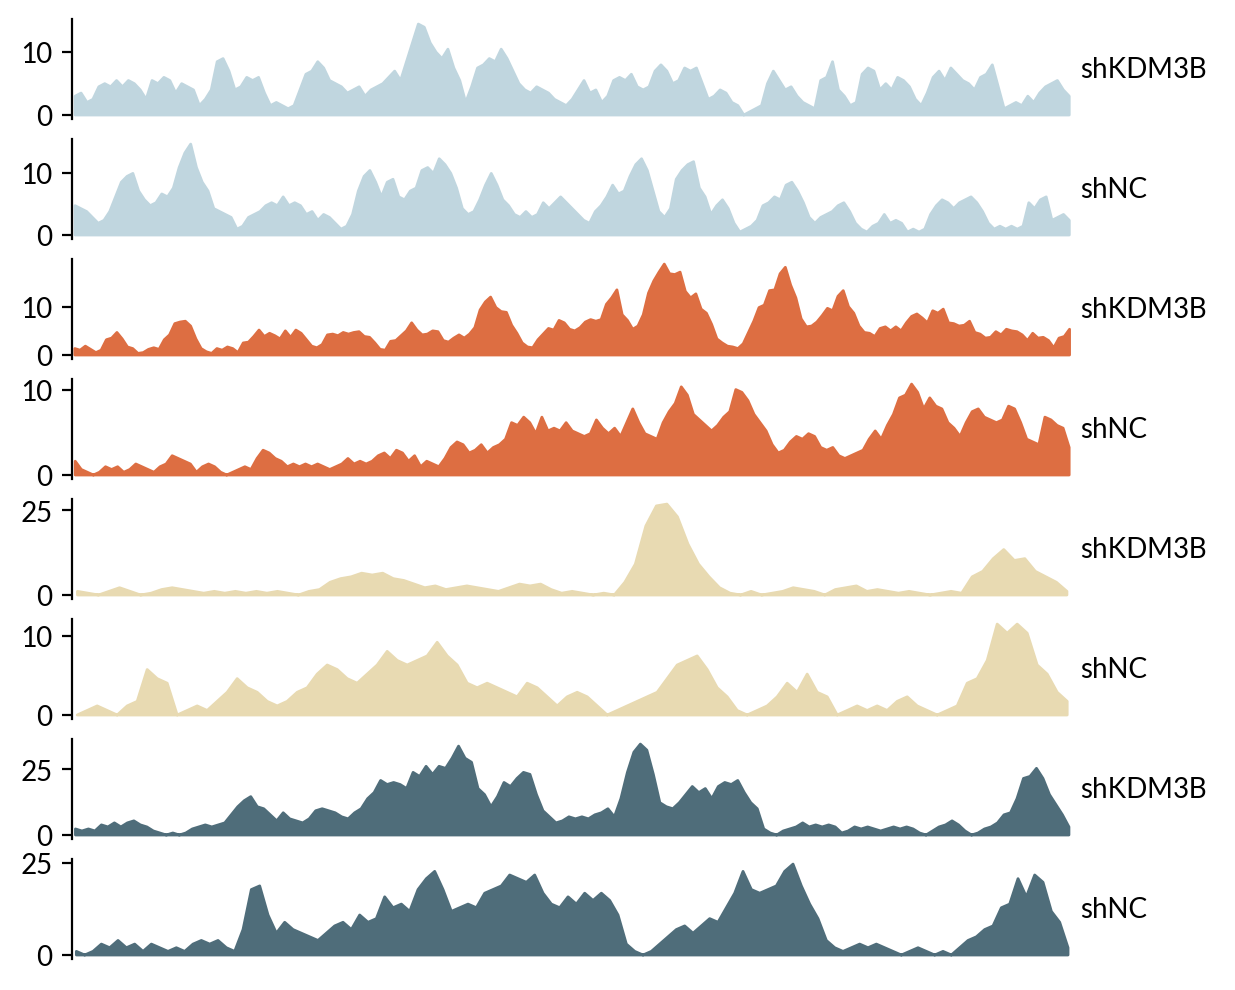

In [6]:
canvas = ma.ZeroHeight(5, name="track")

for _, row in tracks.iterrows():
    cond, enz, track = row
    name = f"{cond}{enz}"
    color = colors[enz]
    canvas.add_bottom(
        mp.Area(
            track,
            color=color,
            add_outline=False,
            alpha=1,
            label=cond,
            label_loc="right",
        ),
        size=TRACK_HEIGHT,
        pad=TRACK_PAD,
        name=name,
    )
canvas.render()

To add experiment labels on the right, we can do a little trick by creating a new canvas and concatenate them later.

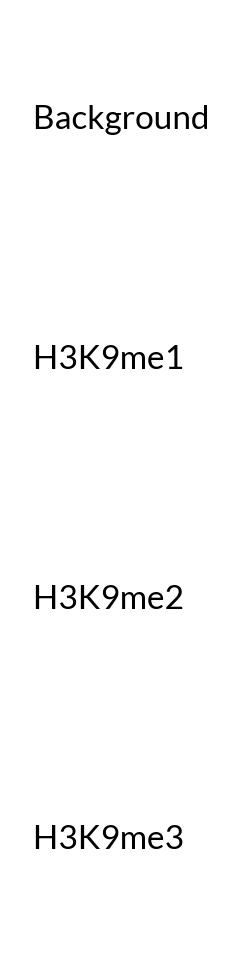

In [7]:
enz_canvas = ma.ZeroHeight(1, name="enz")
for enz in tracks["enz"].drop_duplicates():
    enz_canvas.add_bottom(
        mp.Title(f"‎ ‎ {enz}", align="left"),
        size=TRACK_HEIGHT * 2,
        pad=TRACK_PAD * 2,
        name=enz,
    )

enz_canvas.render()

Now let's put the two canvas together, we can also add some space between plots to display the labels

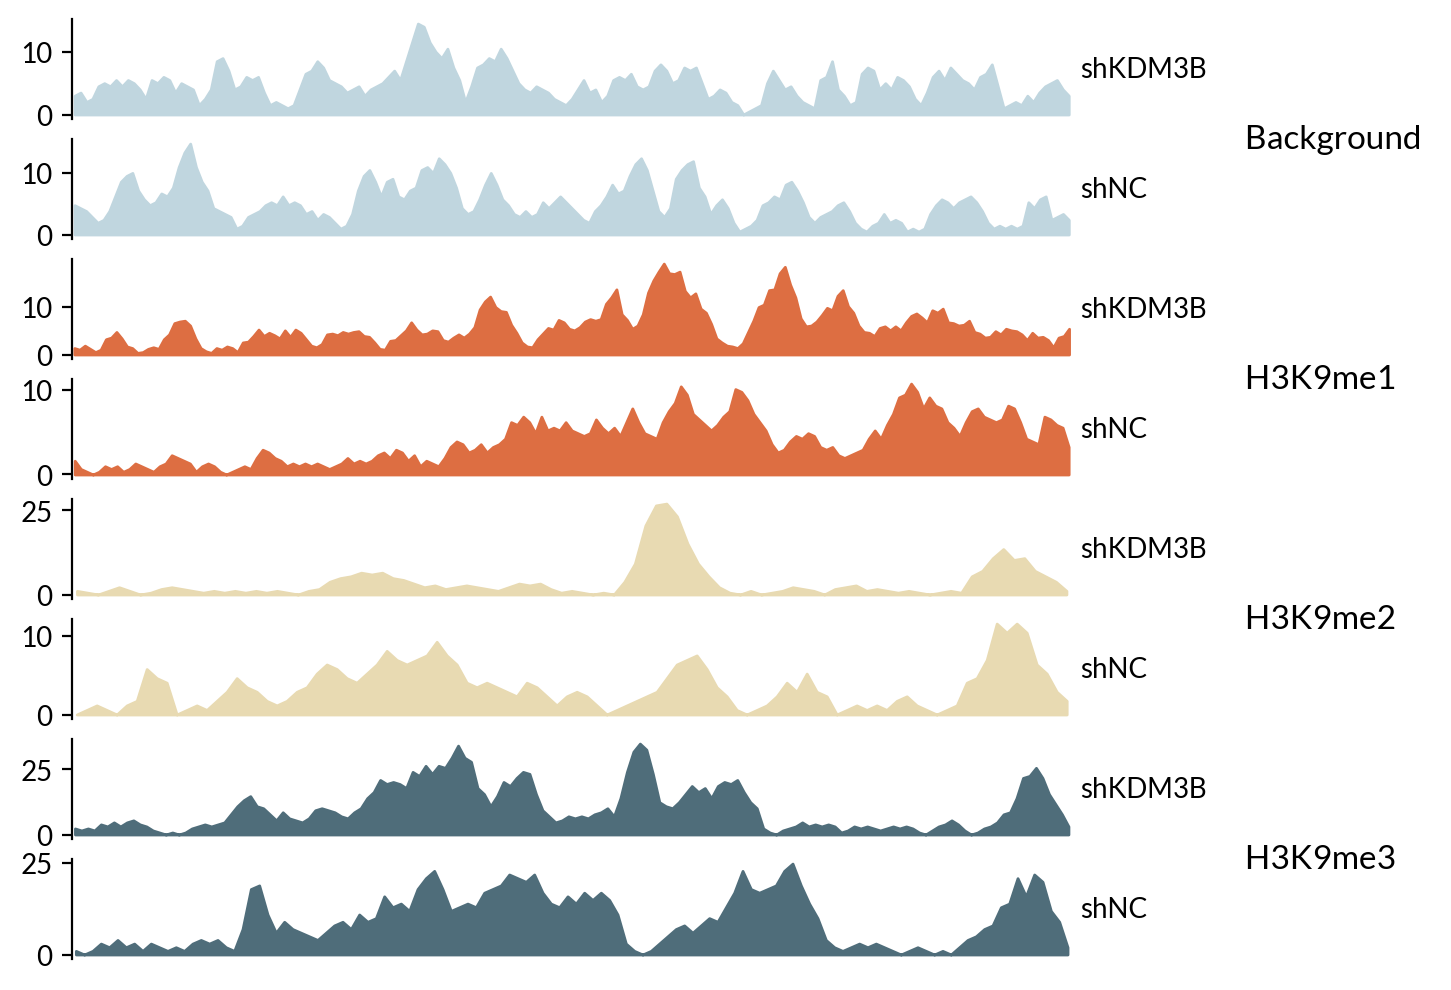

In [8]:
comp = canvas + 0.8 + enz_canvas
comp.render()

However, we need to adjust the axis and add the blacklines, this is not available through marsilea. No worry! You can always retrive the `Axes` object to make customizations as you want. Just remember to assign a name to the canvas you want to retrieve.

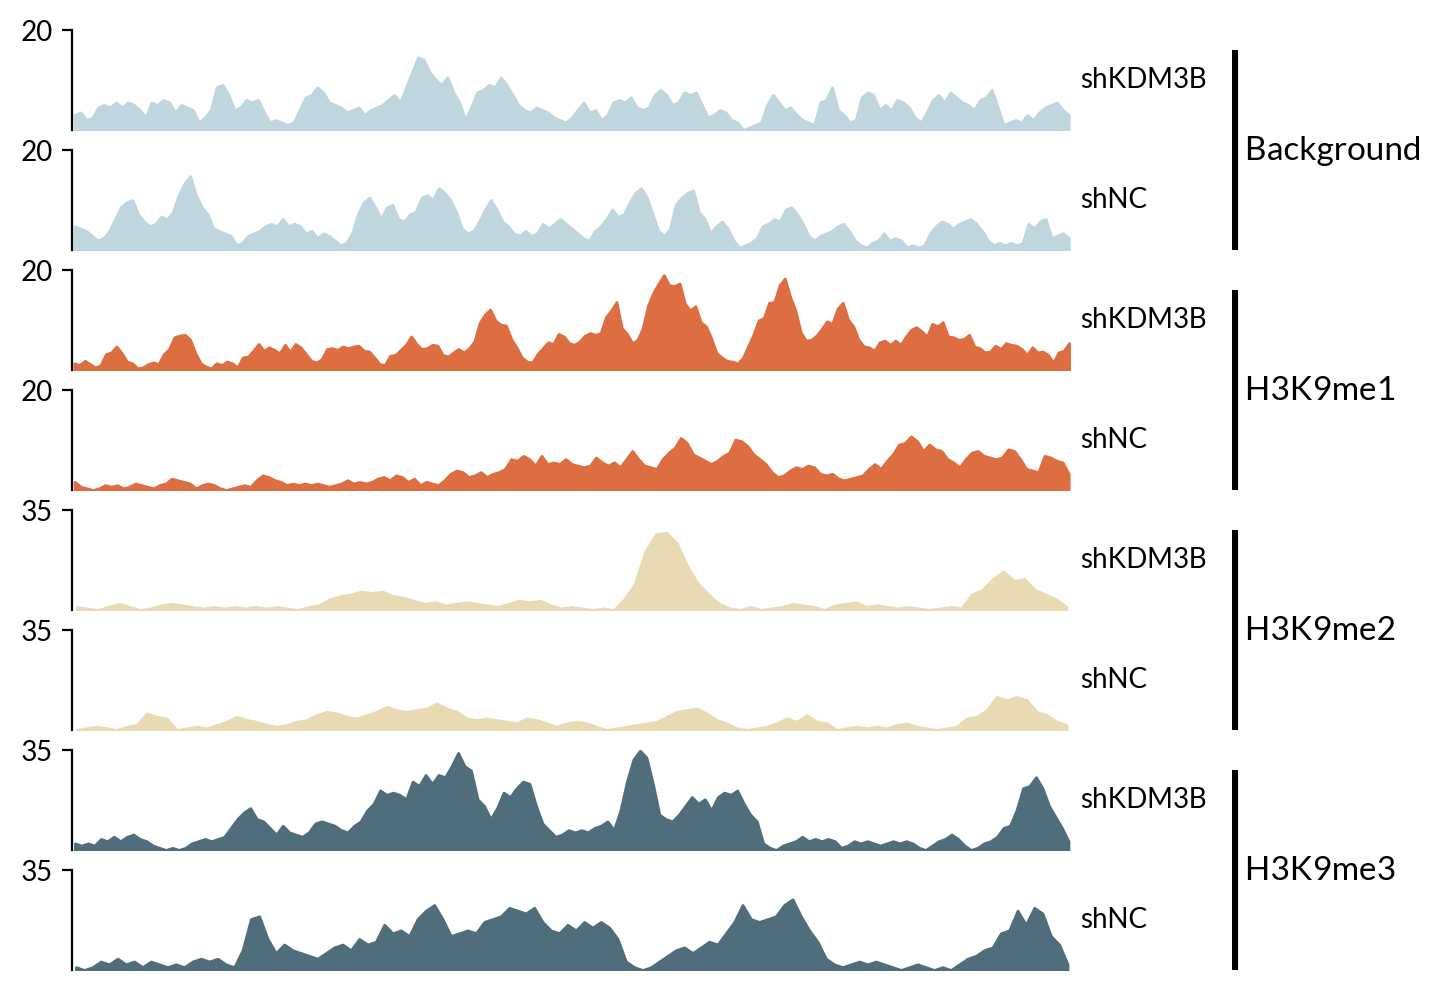

In [9]:
comp = canvas + 0.8 + enz_canvas
comp.render()

# Add a line for enz
for enz in tracks["enz"].drop_duplicates():
    ax = comp.get_ax("enz", enz)
    ax.axvline(x=0, color="k", lw=4)

# Modify the limits
for _, row in tracks.iterrows():
    name = f"{row['cond']}{row['enz']}"
    lim = lims[row["enz"]]
    ax = comp.get_ax("track", name)
    ax.set_ylim(0, lim)
    ax.set_yticks([lim])